In [50]:
import spacy 
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

## Load data

In [9]:
submissions2 = pd.read_json("/Users/ritikabrahmadesam/Downloads/opiates_submissions2.json")
submissions2 = submissions2.head(20)

submissions3 = pd.read_json("/Users/ritikabrahmadesam/Downloads/opiates_submissions3.json")
submissions3 = submissions3.head(20)

In [10]:
submissions2['blob'] = submissions2['selftext'].apply(lambda text: nlp(text)._.blob)
submissions2['polarity'] = submissions2['blob'].apply(lambda b: float(b.polarity))
submissions2['subjectivity'] = submissions2['blob'].apply(lambda b: float(b.subjectivity))

submissions3['blob'] = submissions3['selftext'].apply(lambda text: nlp(text)._.blob)
submissions3['polarity'] = submissions3['blob'].apply(lambda b: float(b.polarity))
submissions3['subjectivity'] = submissions3['blob'].apply(lambda b: float(b.subjectivity))

## Spacy Sentiment Analysis

In [28]:
submissions_polarity = {}
submissions_subjectivity = {}

In [29]:
# This is how happy/sad
display(submissions2['polarity'].describe())
submissions_polarity["submissions1"] = (submissions2['polarity'].describe())

# This is the subjectivity
display(submissions2['subjectivity'].describe())
submissions_subjectivity["submissions1"] = (submissions2['subjectivity'].describe())

count    20.000000
mean      0.008616
std       0.122249
min      -0.233333
25%      -0.006272
50%       0.000000
75%       0.095985
max       0.221591
Name: polarity, dtype: float64

count    20.000000
mean      0.262594
std       0.259594
min       0.000000
25%       0.000000
50%       0.267576
75%       0.497726
max       0.615392
Name: subjectivity, dtype: float64

In [30]:
# This is how happy/sad
submissions3['polarity'].describe()
submissions_polarity["submissions2"] = (submissions3['polarity'].describe())

# This is the subjectivity
submissions3['subjectivity'].describe()
submissions_subjectivity["submissions2"] = (submissions3['subjectivity'].describe())

In [31]:
submission_data_polarity = pd.concat(submissions_polarity, axis = 1)

## Generate Graphs from the Sentiment Analysis

In [37]:
submission_data_polarity = submission_data_polarity.transpose(copy=False)
submission_data_polarity

,count,mean,std,min,25%,50%,75%,max
submissions1,20.0,0.008616,0.122249,-0.233333,-0.006272,0.000000,0.095985,0.221591
submissions2,20.0,0.075170,0.103924,-0.102778,0.000000,0.045505,0.144318,0.313333


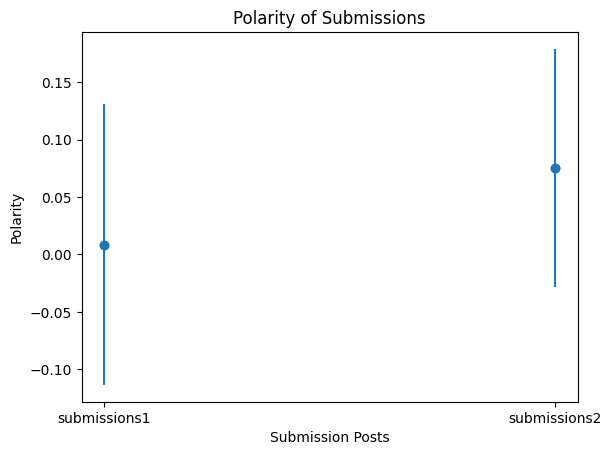

In [62]:
y_error = submission_data_polarity["std"]#[submission_data_polarity["25%"], submission_data_polarity["75%"]]
plt.scatter(submission_data_polarity.index, submission_data_polarity["mean"])
plt.errorbar(submission_data_polarity.index, submission_data_polarity["mean"], yerr=y_error, fmt="o")

plt.title("Polarity of Submissions")
plt.xlabel("Submission Posts")
plt.ylabel("Polarity")

plt.show()